In [38]:
#Import the usual modules
import pandas as pd
import numpy as np

# Data Preprocessing

In [39]:
data = pd.read_excel("stadat-nep0006-22.1.1.6-hu.xlsx", sheet_name="22.1.1.6.", skiprows=1, index_col=0)
data.dropna(axis=0, how="all", inplace=True)
data.head()

,Number of live births,Live births per thousand inhabitants,Total fertility rate
Year,,,
1900,268019,39.7,5.32
1910,265457,35.1,4.86
1920,249458,31.4,3.80
1930,219784,25.4,2.84
1941,177047,18.9,2.48


In [40]:
data.reset_index(inplace=True)
data.rename(columns={"index": "Year"}, inplace=True)
data.head()

,Year,Number of live births,Live births per thousand inhabitants,Total fertility rate
0,1900,268019,39.7,5.32
1,1910,265457,35.1,4.86
2,1920,249458,31.4,3.80
3,1930,219784,25.4,2.84
4,1941,177047,18.9,2.48


In [41]:
data.dtypes

Year                                      int64
Number of live births                     int64
Live births per thousand inhabitants    float64
Total fertility rate                    float64
dtype: object

# Data Exploration

In [42]:
data.describe()

,Year,Number of live births,Live births per thousand inhabitants,Total fertility rate
count,78.000000,78.000000,78.000000,78.000000
mean,1980.846154,138907.628205,14.147734,1.940869
std,26.260967,44409.056353,5.852005,0.709523
min,1900.000000,88049.000000,8.829865,1.231494
25%,1963.250000,97521.250000,9.641804,1.464363
50%,1982.500000,130126.500000,12.400000,1.820016
75%,2001.750000,159880.000000,15.650000,2.079976
max,2021.000000,268019.000000,39.700000,5.320000


<AxesSubplot:xlabel='Year', ylabel='Total fertility rate'>

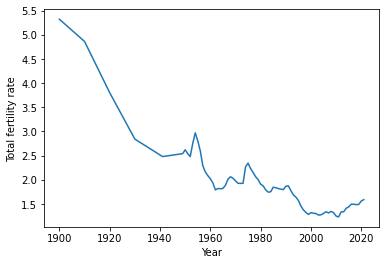

In [43]:
import seaborn as sns

sns.lineplot(data=data, x="Year", y="Total fertility rate")

<AxesSubplot:xlabel='Year', ylabel='Live births per thousand inhabitants'>

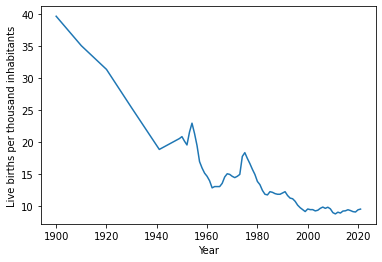

In [44]:
sns.lineplot(data=data, x="Year", y="Live births per thousand inhabitants")

<AxesSubplot:xlabel='Year', ylabel='Number of live births'>

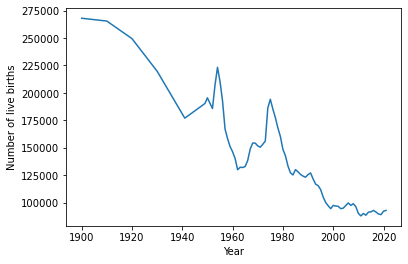

In [45]:
sns.lineplot(data=data, x="Year", y="Number of live births")

# Data Preparation

In [46]:
# create a list of our conditions
conditions = [
    (data['Year'] < 2008),
    (data['Year'] >= 2008) & (data['Year'] <= 2014),
    (data['Year'] >= 2015)
    ]

# create a list of the values we want to assign for each condition
values = ['Not Interesting', 'Pre-CSOK', 'Post-CSOK']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Interest_category'] = np.select(conditions, values)

# display updated DataFrame
data.tail(20)

,Year,Number of live births,Live births per thousand inhabitants,Total fertility rate,Interest_category
58,2002,96804,9.500000,1.301091,Not Interesting
59,2003,94647,9.300000,1.269812,Not Interesting
60,2004,95137,9.400000,1.274270,Not Interesting
61,2005,97496,9.700000,1.304338,Not Interesting
62,2006,99871,9.900000,1.338308,Not Interesting
63,2007,97613,9.700000,1.313892,Not Interesting
64,2008,99149,9.877181,1.345522,Pre-CSOK
65,2009,96442,9.622406,1.319283,Pre-CSOK
66,2010,90335,9.033479,1.248186,Pre-CSOK
67,2011,88049,8.829865,1.231494,Pre-CSOK


In [47]:
pre_csok = data.loc[data['Interest_category'] == 'Pre-CSOK']
post_csok = data.loc[data['Interest_category'] == 'Post-CSOK']

In [48]:
pre_csok_birth_rate = pre_csok["Total fertility rate"].to_list()
post_csok_birth_rate = post_csok["Total fertility rate"].to_list()

In [49]:
pre_csok_lbpt = pre_csok["Live births per thousand inhabitants"].to_list()
post_csok_lbpt = post_csok["Live births per thousand inhabitants"].to_list()

# Statistical Tests

### Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [50]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(pre_csok_birth_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.922, p=0.486
Probably Gaussian


In [51]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(post_csok_birth_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.891, p=0.282
Probably Gaussian


### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

- H0: There is no difference in birth rate before and after the CSOK regulation. 
- H1: There is some difference in birth rate.

In [52]:

# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(pre_csok_birth_rate, post_csok_birth_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. ')
else:
	print('The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. ')

stat=-6.319, p=0.000
The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. 


### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

- H0: There is no difference in birth rate  before and after the CSOK regulation. 
- H1: There is some difference in birth rate.

In [53]:

# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(pre_csok_birth_rate, post_csok_birth_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. ')
else:
	print('The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. ')

stat=39.934, p=0.000
The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. 


Just out of curiosity, we test for Live births per thousand inhabitants	as well.

In [54]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(pre_csok_lbpt)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.913, p=0.416
Probably Gaussian


In [55]:

# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(post_csok_lbpt)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.958, p=0.803
Probably Gaussian


In [56]:

# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(pre_csok_lbpt, post_csok_lbpt)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. ')
else:
	print('The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. ')

stat=-0.750, p=0.467
The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. 


In [57]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(pre_csok_lbpt, post_csok_lbpt)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. ')
else:
	print('The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. ')

stat=0.563, p=0.467
The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. 
